In [1]:
# Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Import Dataset
dataset = pd.read_csv('Position_Salaries.csv')
# We don't take Position column, because it's the same thing as Level column
X = dataset.iloc[:, 1:2].values # we didn't use : , 1 because that would return a 1D array, we need a 2D array for the regressor
y = dataset.iloc[:, -1].values
#dataset.info()
dataset.head()


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
# Missing data handling
dataset.isnull().sum()   # count missing values per column
# dataset[dataset.isnull().any(axis=1)] # show rows with at least one missing value

Position    0
Level       0
Salary      0
dtype: int64

In [7]:
X, y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]], dtype=int64),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000], dtype=int64))

In [ ]:
# Categorical data handling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# LabelEncoder: encodes labels to integer values (e.g., 'red'->0, 'green'->1).
# Note: using LabelEncoder on input features can introduce an artificial ordinal relationship.
# For nominal categorical features we prefer OneHotEncoder to avoid implying order.
labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])  # Encode the first column to integers

# ColumnTransformer lets us apply OneHotEncoder only to column 3 and pass through the rest.
ct_X = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), [3])],   # One-hot encode column 3
    remainder='passthrough'                                         # Leave the rest unchanged
)
X = ct_X.fit_transform(X)
X = X[: , 1: ]  # Always remove one dummy variable, so Avoiding the Dummy Variable Trap by removing the first dummy variable column
X

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)    

In [19]:
# Building the Multiple Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
regressor = LinearRegression()
regressor.fit(X_poly, y)

LinearRegression()

Text(0, 0.5, 'Salary')

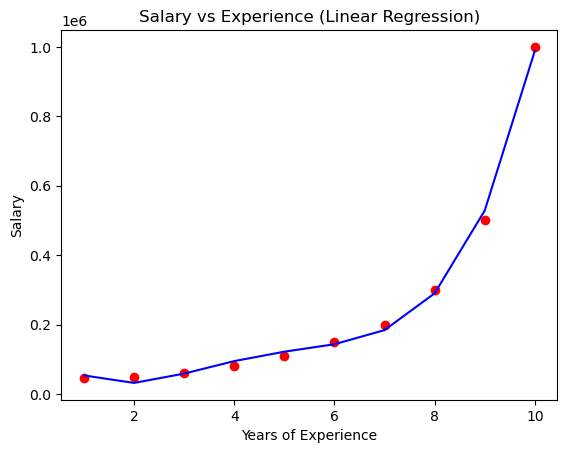

In [20]:
# Show result
plt.scatter(X, y, color='red')
plt.plot(X, regressor.predict(X_poly), color='blue')
plt.title('Salary vs Experience (Linear Regression)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')